In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Interpolation

So at this point, we now want to look at the following problem.  Suppose I give you some data in the form of a set of points

$$
\left\{x_{j},f_{j} \right\}_{j=0}^{n}
$$

where we think that $f_{j} = f(x_{j})$, which is to say, we think the data comes from a function $f(x)$, but we do not know the function $f(x)$.  Note, each point $x_{j}$ is called a _node_.  The question becomes, how might we find an approximation to $f(x)$?  As it turns out, there are an infinite number of ways to solve this problem, each with good and bad features.  The approach we will study first is called _ Lagrange Interpolation _.  

This method starts by deciding we are going to fit the data with an $n^{th}$ order polynomial, i.e. we choose a polynomial $P_{n}(x)$ of the form 

$$
P_{n}(x) = p_{0} + p_{1}x + \cdots + p_{n}x^{n},
$$

where the coefficients $p_{j}$ are found from the _ interpolation formulas _

$$
P_{n}(x_{j}) = f_{j}, ~ j=0,\cdots,n.
$$

As you can see, we have $n+1$ unknown coefficients $p_{j}$ and we have $n+1$ equations provided by the interpolation formulas.  Thus, we see that in principle we should be able to determine $P_{n}(x)$.  The advantage of having $P_{n}(x)$ is that anything else we want to know about $f(x)$, such as $f'(x)$ or $\int f(x)dx$, we can find by using $P_{n}(x)$.  

Now, there is another important way to think about $P_{n}(x)$.  While it is _ completely equivalent _ to what we have described above, it forms a very fundamental way to think about interpolation that comes up again and again in applied mathematics and numerical analysis.  In this approach, we write $P_{n}(x)$ as 

$$
P_{n}(x) = \sum_{j=0}^{n} f_{j}L_{j}^{(n)}(x),
$$

where the functions $L_{j}^{(n)}(x)$ are themselves $n^{th}$-order polynomials which are defined so that 

$$
L_{j}^{(n)}(x_{j}) = 1, ~ L_{j}^{(n)}(x_{k}) = 0, ~k\neq j. 
$$

We can see this idea illustrated in the figure below.  Here, we are interpolating through the data set

$$
\begin{array}{r|r}
x_{j} & f_{j}\\
\hline
-9 & 5\\
-4 & 2\\
-1 & -2\\
7 & 9
\end{array}
$$
![linterp](https://upload.wikimedia.org/wikipedia/commons/5/5a/Lagrange_polynomial.svg)

So,if we think about it, we ultimately see that we can find the $L^{(n)}_{j}(x)$ via the formula

$$
L_{j}^{(n)}(x) = \frac{\prod_{l\neq j}^{n}(x-x_{l})}{\prod_{l\neq j}^{n}(x_{j}-x_{l})}.
$$

We can motivate this result by looking at simple cases and working our way up.  So, suppose we let $n=1$.  In this case, we need to find two linear functions $L^{(1)}_{0}(x)$ and $L^{(1)}_{1}(x)$.  As we can readily see, in order to satisfy our requirements for these functions, we can just use

$$
L^{(1)}_{0}(x) = \frac{x-x_{1}}{x_{0}-x_{1}}, ~ L^{(1)}_{1}(x) = \frac{x-x_{0}}{x_{1}-x_{0}}.
$$

We clearly see in this case that 
$$
L^{(1)}_{0}(x_{0}) = 1, ~ L^{(1)}_{0}(x_{1}) = 0, ~~L^{(1)}_{1}(x_{0}) = 0, ~ L^{(1)}_{1}(x_{1}) = 1.
$$

Likewise, if we go to $n=2$, we need three different quadratic functions which, using either the formula or our intuition, we realize are 

$$
L^{(2)}_{0}(x) = \frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}, ~ L^{(2)}_{1}(x) = \frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}, ~ L^{(2)}_{2}(x) = \frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{1})(x_{2}-x_{1})}.
$$

So as we see, we can build $P_{n}(x)$ from the weighted $L^{(n)}_{j}(x)$ functions, which act as a _ basis _ for our interpolating polynomial.  The question then is, how can we determine the functions $L^{(n)}_{j}(x)$.  

In [3]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    n = xvals.size
    for ll in xrange(0,n):
        if ll != jj:
            lval *= (x-xvals[ll])/(xvals[jj]-xvals[ll])
    return lval

In [4]:
def lagran_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in xrange(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
    return ipoly

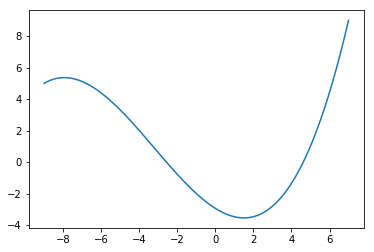

In [5]:
xvals = np.array([-9.,-4.,-1.,7.])
fvals = np.array([5.,2.,-2.,9.])
xinterp = np.linspace(-9.,7.,int(1e2))
ivals = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,ivals)

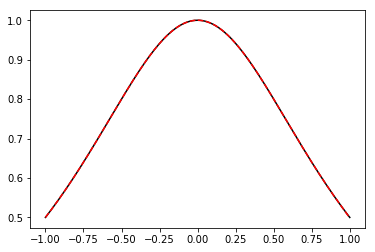

In [11]:
xinterp = np.linspace(-1.,1.,int(1e3))
finterp = 1./(1.+xinterp**2.)
xvals = xinterp[::50]
fvals = finterp[::50]
linterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,finterp,ls='-',color='k')
plt.plot(xinterp,linterp,ls='--',color='r')

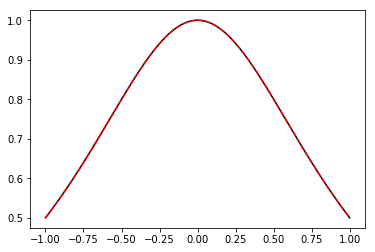

In [13]:
xvals = xinterp[::25]
fvals = finterp[::25]
linterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,finterp,ls='-',color='k')
plt.plot(xinterp,linterp,ls='--',color='r')

So, a way to get around this is to use unevenly spaced meshes of points.  To wit, we use what are called the Chebyshev points or nodes, which are given by 

$$
x_{j} = \cos\left(\frac{2j+1}{2n+2}\pi\right), ~ j=0,\cdots,n
$$

Modify the above use of Lagrange interpolation so that you build the functions $L_{j}^{(n)}$ using these nodes. 

## Splines

So, an alternative to our approach above is to use a more less global, or more global approach, in which we do interpolation via pieces wise defined functions called _ splines _.  As before, we start our discussion with a data set 

$$
\left\{x_{j},f_{j}\right\}_{j=0}^{n}.
$$

We now define our _cubic splines_ $S_{j}(x)$ to be third order polynomials, i.e. 

$$
S_{j}(x) = a_{j}(x-x_{j})^{3} + b_{j}(x-x_{j})^{2} + c_{j}(x-x_{j}) + d_{j},
$$

such that 

\begin{align}
S_{j}(x_{j}) = & f_{j}, ~ j=0,\cdots,n-1\\
S_{j}(x_{j+1}) = & S_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 \\
S'_{j}(x_{j+1}) = & S'_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 \\
S''_{j}(x_{j+1}) = & S''_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 
\end{align}

which is to say, we require that we interpolate the data, and the each spline as as its first and second derivatives be continuous at each node.  